# Project Property Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()


In [3]:
data = pd.DataFrame(california_housing['data'],columns=california_housing.feature_names)
data['price'] = california_housing['target']
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# EDA

In [4]:
data.shape

(20640, 9)

In [5]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
data['HouseAge'].value_counts().sort_values()

1.0        4
51.0      48
2.0       58
3.0       62
49.0     134
50.0     136
6.0      160
7.0      175
48.0     177
4.0      191
47.0     198
9.0      205
8.0      206
12.0     238
5.0      244
46.0     245
11.0     254
10.0     264
45.0     294
41.0     296
13.0     302
40.0     304
43.0     353
44.0     356
42.0     368
39.0     369
38.0     394
22.0     399
14.0     412
21.0     446
23.0     448
31.0     458
29.0     461
20.0     465
28.0     471
30.0     476
24.0     478
27.0     488
19.0     502
15.0     512
37.0     537
32.0     565
25.0     566
18.0     570
33.0     615
26.0     619
34.0     689
17.0     698
16.0     771
35.0     824
36.0     862
52.0    1273
Name: HouseAge, dtype: int64

In [8]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

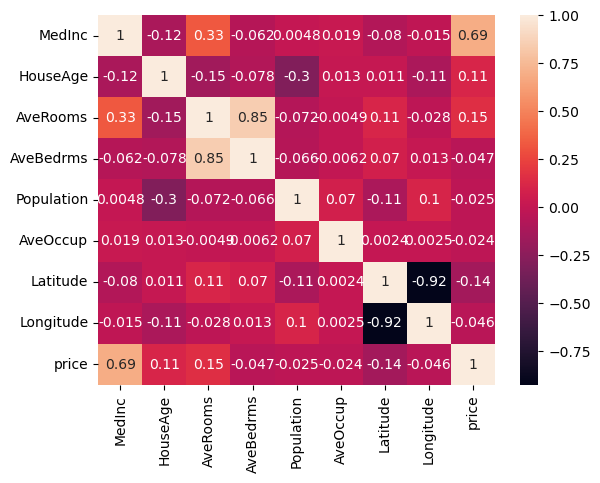

In [10]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data['MedInc'].plot.hist()
plt.show()

In [ ]:
data['price'].plot.hist()
plt.show()

In [ ]:
x = data.drop('price',axis = 1)
x.sample()

In [ ]:
scaler = StandardScaler()
x_scalled = scaler.fit_transform(x)
x_scalled

# Train Test split

In [29]:
from sklearn.model_selection import train_test_split
x = x_scalled
y = data['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 31)
print('done')


done


# linear regression

In [30]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
mae_lr = mean_absolute_error(y_test,y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test,y_pred_lr)
print('Linear Regression Performance')
print('MAE:',mae_lr)
print('MSE:',mse_lr)
print('RMSE:',rmse_lr)
print('R-squarerd:',r2_lr)

Linear Regression Performance
MAE: 0.5272533316379394
MSE: 0.5209426103218227
RMSE: 0.721763541834736
R-squarerd: 0.6030139017639451


In [31]:
ridge = Ridge()
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)
print('Linear Regression Performance')
print('MAE:',mae_ridge)
print('MSE:',mse_ridge)
print('RMSE:',rmse_ridge)
print('R-squarerd:',r2_ridge)

Linear Regression Performance
MAE: 0.5272418719338348
MSE: 0.5209349056428834
RMSE: 0.7217582044167447
R-squarerd: 0.603019773140887


In [32]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)
mae_lasso = mean_absolute_error(y_test,y_pred_lasso)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
rmse_lasso= np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)
print('Lasso Regression Performance')
print('MAE:',mae_lasso)
print('MSE:',mse_lasso)
print('RMSE:',rmse_lasso)
print('R-squarerd:',r2_lasso)

Lasso Regression Performance
MAE: 0.6117180956469566
MSE: 0.6613677415660064
RMSE: 0.8132451915418907
R-squarerd: 0.4960024501330721


In [33]:
x_train

array([[ 0.28483836,  0.18756187, -0.33243703, ..., -0.04926267,
        -0.79678867,  0.7784964 ],
       [-0.20974634,  0.90268458, -0.19576723, ..., -0.02350199,
         0.94954724, -1.25795692],
       [-0.02482977, -1.48105778, -0.03357218, ..., -0.06829621,
         0.32217723,  0.10966124],
       ...,
       [ 0.78626598,  0.58485227,  0.35415564, ...,  0.08793552,
         0.93550164, -1.25795692],
       [-0.14210678,  0.50539419, -0.4029462 , ..., -0.07012113,
        -0.67506016,  0.58383542],
       [ 0.338371  , -1.08376738,  0.45968103, ..., -0.00815496,
        -1.36329442,  1.29260104]])

# OLS Model

In [21]:
import statsmodels.api as sm
new_x_train = sm.add_constant(x_train)
ols_model = sm.OLS(y_train,new_x_train).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3186.
Date:                Fri, 05 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:44:08   Log-Likelihood:                -18113.
No. Observations:               16512   AIC:                         3.624e+04
Df Residuals:                   16503   BIC:                         3.631e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0688      0.006    366.717      0.000       2.058       2.080
x1             0.8309      0.009     93.071      0.000       0.813       0.848
x2             0.1183      0.006     18.873      0.000       0.106       0.131
x3            -0.2634      0.016    -16.256      0.000      -0.295      -0.232
x4             0.3033      0.015     20.488      0.000       0.274       0.332
x5            -0.0044      0.006     -0.734      0.463      -0.016       0.007
x6            -0.0359      0.005     -7.074      0.000      -0.046      -0.026
x7            -0.9080      0.017    -52.530      0.000      -0.942      -0.874
x8            -0.8771      0.017    -51.567      0.000      -0.910      -0.844
==============================================================================
Omnibus:                     3496.595   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11669.022
Skew:                           1.063   Prob(JB):                         0.00
Kurtosis:                       6.528   Cond. No.                         6.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
new_x_test = sm.add_constant(x_test)
y_pred_ols = ols_model.predict(new_x_test)

In [35]:
mae_ols = mean_absolute_error(y_test,y_pred_ols )
mse_ols  = mean_squared_error(y_test,y_pred_ols )
rmse_ols = np.sqrt(mse_ols )
r2_ols = r2_score(y_test,y_pred_ols )
print('OLS Performance')
print('MAE:',mae_ols)
print('MSE:',mse_ols)
print('RMSE:',rmse_ols)
print('R-squarerd:',r2_ols)

OLS Performance
MAE: 0.5272533316379392
MSE: 0.5209426103218227
RMSE: 0.721763541834736
R-squarerd: 0.6030139017639451


In [36]:
model_info = {
                'Model': ['Linear Regression','Ridge Regrssion','Lasso Regression','OLS Method'],
                'MAE': [mae_lr,mae_ridge,mae_lasso,mae_ols],
                'MSE': [mse_lr,mse_ridge,mse_lasso,mse_ols],
                'RMSE': [rmse_lr,rmse_ridge,rmse_lasso,rmse_ols],
                'R-squared': [r2_lr,r2_ridge,r2_lasso,r2_ols],
            }
performance = pd.DataFrame(model_info)
performance

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression,0.527253,0.520943,0.721764,0.603014
1,Ridge Regrssion,0.527242,0.520935,0.721758,0.603020
2,Lasso Regression,0.611718,0.661368,0.813245,0.496002
3,OLS Method,0.527253,0.520943,0.721764,0.603014


In [25]:
performance['R-squared'] == performance['R-squared'].max()

0    False
1     True
2    False
3    False
Name: R-squared, dtype: bool

In [26]:
performance[performance['R-squared'] == performance['R-squared'].max()]

,Model,MAE,MSE,RMSE,R-squared
1,Ridge Regrssion,0.527242,0.520935,0.721758,0.60302


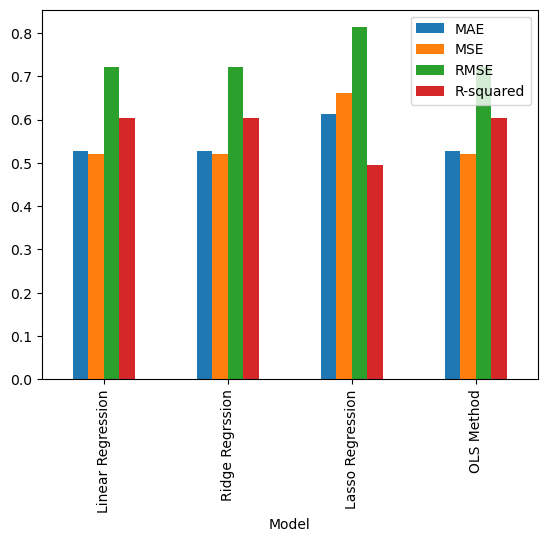

In [27]:
performance.plot(kind= 'bar',x='Model')
plt.show()

In [28]:
import joblib
joblib.dump(ridge_model,'best_model.pkl')

NameError: name 'ridge_model' is not defined

In [37]:
best_model = joblib.load('best_model.pkl')
new_data = np.array()
scaled_new_data = scaler.transform(new_data)
predicted_price = best_model.predict(scaled_new_data)
print('Predicted Price:',predicted_price)

TypeError: array() missing required argument 'object' (pos 0)

In [38]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [39]:
best_model = joblib.load('best_model.pkl')
new_data = np.array([[7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24]])
scaled_new_data = scaler.transform(new_data)
predicted_price = best_model.predict(scaled_new_data)
print('Predicted Price:',predicted_price)

Predicted Price: [3.68103303]
